In [51]:
import cv2
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import numpy as np

In [52]:
def read_image_as_tensor(image_path):
    # 1. Read as single-channel
    np_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # np_img.dtype == uint8, shape (H, W)

    # 2. Convert to float32 in [0,1]
    np_img = np_img.astype('float32') / 255.0

    # 3. To torch and add channel dim
    tensor = torch.from_numpy(np_img)    # shape [H, W]
    tensor = tensor.unsqueeze(0)         # shape [1, H, W]

    return tensor

In [53]:
def plot_tensor(img_tensor):
    """
    Display a single-channel image tensor.
    Accepts shape [1, H, W] or [H, W], values in [0,1] or [-1,1].
    """
    # Remove batch/channel dims
    img = img_tensor.squeeze().cpu().numpy()
    
    # If in [-1,1], rescale to [0,1]
    if img.min() < 0:
        img = (img + 1) / 2
    
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()


In [54]:
image = read_image_as_tensor("generated/backgrounds/i1.png")
mask = read_image_as_tensor("generated/masks/i1.png")

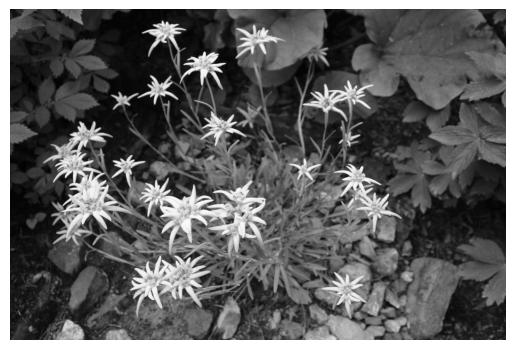

In [55]:
plot_tensor(image)

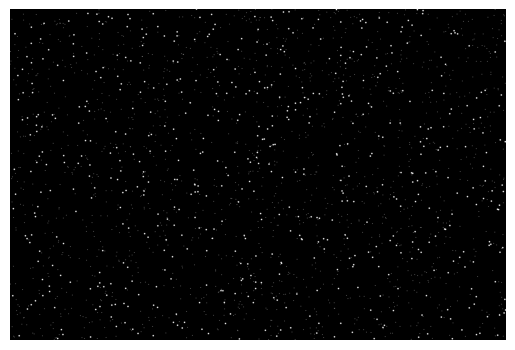

In [56]:
plot_tensor(mask)

In [57]:
corrupted = image * (1 -  mask)

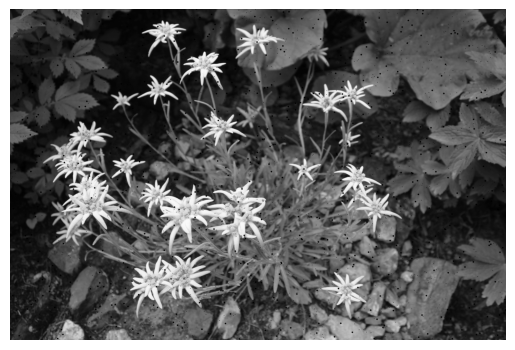

In [58]:
plot_tensor(corrupted)

In [ ]:
import numpy as np
from torch.utils.data import Dataset, DataLoader
from pathlib import Path

class CropAugmentDataset(Dataset):
    def __init__(self, folder, crop_size=256, n_crops_per_img=20):
        """
        folder:           path to the folder containing your .png images
        crop_size:        size of the square patch to crop (e.g. 256)
        n_crops_per_img:  how many random patches to draw from each source image
        """
        # gather and sort all the pngs in that folder
        self.paths = sorted(Path(folder).glob('*.png'))
        self.crop_size = crop_size
        self.n_crops = n_crops_per_img

    def __len__(self):
        return len(self.paths) * self.n_crops

    def __getitem__(self, idx):
        # decide which image to use
        img_path = self.paths[idx // self.n_crops]
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)  # H×W, uint8
        H, W = img.shape

        # --- 1) random crop ---
        top  = np.random.randint(0, H - self.crop_size + 1)
        left = np.random.randint(0, W - self.crop_size + 1)
        patch = img[top:top+self.crop_size, left:left+self.crop_size]

        tensor_img = torch.from_numpy(patch).unsqueeze(0)  # [1,H,W]

        return corrupted, tensor_mask, tensor_img

# ——— Usage ———
paths_folder = '/path/to/your/images'
ds     = CropAugmentDataset(paths_folder, crop_size=256, n_crops_per_img=20)
# loader = DataLoader(ds, batch_size=8, shuffle=True, num_workers=4)

# for corrupted, mask, gt in loader:
#     print(corrupted.shape, mask.shape, gt.shape)  # [8,1,256,256] each
#     break


ValueError: num_samples should be a positive integer value, but got num_samples=0